In [ ]:
!pip install yfinance torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import datetime

# ---------------------------
# NLP and Sentiment Libraries
# ---------------------------
import nltk
# Download required NLTK data for VADER
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from transformers import pipeline

# ---------------------------
# Finance Data Extraction
# ---------------------------
import yfinance as yf

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.autograd import Variable
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.dates as mdates
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from datetime import datetime, timedelta
from collections import Counter
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Past Financial data of GameStop
tickerSymbol = 'GME'
tickerData = yf.Ticker(tickerSymbol)
stock_prices_df = tickerData.history(period='1d', start='2021-01-04', end='2021-12-31')
columns = stock_prices_df.columns.tolist()
close_index = columns.index('Close')
columns = [columns[close_index]] + columns[:close_index] + columns[close_index + 1:]
stock_prices_df = stock_prices_df[columns]
stock_prices_df.head(3)

,Close,Open,High,Low,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04 00:00:00-05:00,4.3125,4.7500,4.775,4.2875,40090000,0.0,0.0
2021-01-05 00:00:00-05:00,4.3425,4.3375,4.520,4.3075,19846000,0.0,0.0
2021-01-06 00:00:00-05:00,4.5900,4.3350,4.745,4.3325,24224800,0.0,0.0


In [ ]:
# Reddit Sentiment Data from Harvard
path = '/content/drive/MyDrive/rGME_dataset_features.csv'
reddit_harvard_df = pd.read_csv(path)
reddit_harvard_df.head()

<ipython-input-7-24b96faadf11>:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  reddit_harvard_df = pd.read_csv(path)


,Unnamed: 0,id,title,url,score,author,num_comments,date,flair,compound,...,_poss,_intj,_appos,_npadvmod,_predet,_case,_expl,_oprd,_dative,_nmod
0,0,kqfajb,You NEED to see this about GME 🚀🚀🚀🚀🚀🚀,https://www.reddit.com/r/GME/comments/kqfajb/y...,1.0,TitsDownOnly,9.0,2021-01-04,NaN,0.9872,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,kqjh2t,Short Squeeze Incoming 🚀🚀🚀🚀🚀🚀🚀,/r/wallstreetbets/comments/kqcwdo/gamestops_gr...,1.0,zoomermoney,1.0,2021-01-04,NaN,0.9906,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,kqvp7l,THIS CONVINCED ME TO ALL IN 💰GME (EXTREME PUMP...,https://www.reddit.com/r/GME/comments/kqvp7l/t...,1.0,TitsDownOnly,6.0,2021-01-05,NaN,0.5319,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,krcwch,You already know what we must do brothers and ...,/r/wallstreetbets/comments/kr98ym/gme_gang_we_...,1.0,dontforgettolive,4.0,2021-01-05,NaN,-0.2960,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,krnthg,ICR conference (11th Jan),https://www.reddit.com/r/GME/comments/krnthg/i...,1.0,nicky94,10.0,2021-01-06,NaN,0.0000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Reddit WallStreetBets Posts
path = '/content/drive/MyDrive/reddit_wsb.csv'
reddit_kaggle_df = pd.read_csv(path)
reddit_kaggle_df.head()


,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


In [ ]:
# Print the dtypes to confirm the data types
print("Dataset dtypes:")
print(reddit_kaggle_df.dtypes)

# Combine the title and body into one new text column for our analysis
reddit_kaggle_df['text'] = reddit_kaggle_df['title'].fillna('') + " " + reddit_kaggle_df['body'].fillna('')

Dataset dtypes:
title         object
score          int64
id            object
url           object
comms_num      int64
created      float64
body          object
timestamp     object
dtype: object


In [ ]:
# ============================
# 2. Data Preprocessing
# ============================

def clean_text(text):
    """
    Perform basic text cleaning:
      - Remove URLs.
      - Remove HTML tags.
      - Remove punctuation.
      - Convert to lowercase.
      - Remove extra whitespace.
    """
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase and strip extra whitespace
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning to the combined text column
reddit_kaggle_df['clean_text'] = reddit_kaggle_df['text'].apply(clean_text)



VADER Sentiment Examples:
  vader_sentiment  vader_compound
0         Neutral          0.0000
1        Negative         -0.6249
2        Negative         -0.6124
3        Negative         -0.2748
4        Positive          0.2235


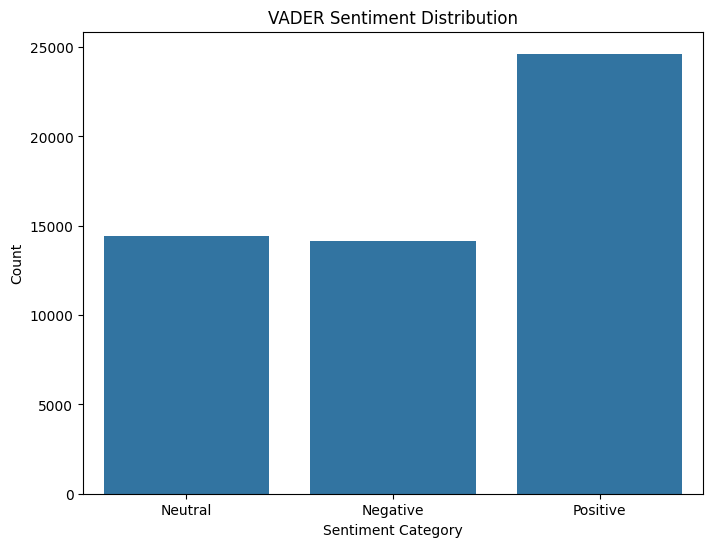

In [ ]:
# ============================
# 3. Sentiment Analysis Using VADER
# ============================

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    """
    Determine sentiment using NLTK's VADER.
    Return a tuple: (sentiment_label, compound_score).
    """
    scores = sid.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        sentiment = "Positive"
    elif compound <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return sentiment, compound

# Apply the VADER sentiment function to the cleaned text
reddit_kaggle_df[['vader_sentiment', 'vader_compound']] = reddit_kaggle_df['clean_text'].apply(
    lambda x: pd.Series(get_vader_sentiment(x))
)

# Display a sample of VADER sentiment results
print("\nVADER Sentiment Examples:")
print(reddit_kaggle_df[['vader_sentiment', 'vader_compound']].head())

# Visualize the distribution of VADER sentiments
plt.figure(figsize=(8,6))
sns.countplot(x='vader_sentiment', data=reddit_kaggle_df)
plt.title("VADER Sentiment Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



FinBERT Sentiment Examples:
  finbert_sentiment  finbert_score
0           Neutral       0.997360
1           Neutral       0.740807
2           Neutral       0.626472
3           Neutral       0.999743
4           Neutral       0.812407


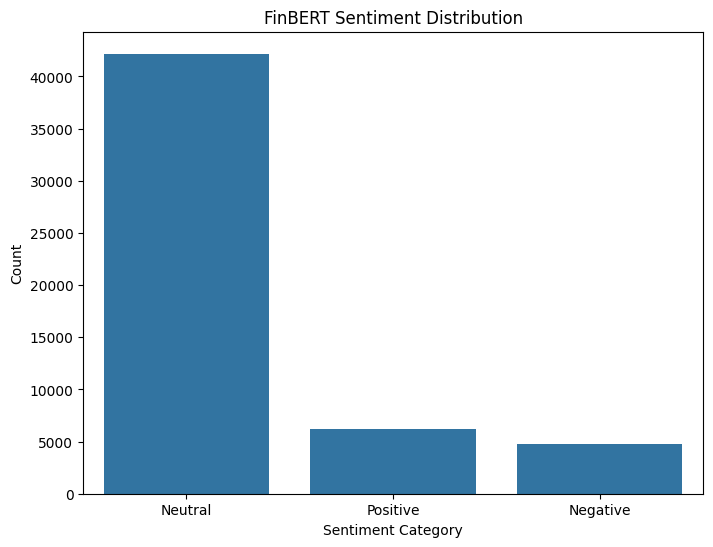

In [ ]:
# ============================
# 4. Sentiment Analysis Using FinBERT
# ============================

# Load the FinBERT sentiment model from Hugging Face
finbert = pipeline("sentiment-analysis",
                   model="yiyanghkust/finbert-tone",
                   tokenizer="yiyanghkust/finbert-tone")

def get_finbert_sentiment(text):
    """
    Use FinBERT to analyze sentiment.
    Input text is capped at 512 characters to avoid token-length issues.
    Returns a tuple: (sentiment_label, score)
    """
    try:
        result = finbert(text[:512])[0]
        label = result['label']
        score = result['score']
        return label, score
    except Exception as e:
        # In case of any error, return None values.
        return None, None

# Apply FinBERT sentiment analysis to the cleaned texts (processing all rows)
reddit_kaggle_df[['finbert_sentiment', 'finbert_score']] = reddit_kaggle_df['clean_text'].apply(
    lambda x: pd.Series(get_finbert_sentiment(x))
)

# Display a sample of FinBERT sentiment results
print("\nFinBERT Sentiment Examples:")
print(reddit_kaggle_df[['finbert_sentiment', 'finbert_score']].head())

# Visualize the distribution of FinBERT sentiments
plt.figure(figsize=(8,6))
sns.countplot(x='finbert_sentiment', data=reddit_kaggle_df)
plt.title("FinBERT Sentiment Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()


In [ ]:
# Checking the missing values
missing_values = stock_prices_df.isnull().sum()
missing_values

,0
Close,0
Open,0
High,0
Low,0
Volume,0
Dividends,0
Stock Splits,0


In [ ]:
reddit_harvard_df['date'] = pd.to_datetime(reddit_harvard_df['date'])
sentiment_aggregated = reddit_harvard_df.groupby('date').agg({'compound': 'mean', 'neg': 'mean', 'neu': 'mean', 'pos': 'mean'}).reset_index()
sentiment_aggregated.head(3)

,date,compound,neg,neu,pos
0,2021-01-04,0.98890,0.0000,0.1340,0.8660
1,2021-01-05,0.11795,0.0575,0.8145,0.1280
2,2021-01-06,0.38885,0.0535,0.7580,0.1885


In [ ]:
# Checking the missing values
missing_values = sentiment_aggregated.isnull().sum()
missing_values

,0
date,0
compound,0
neg,0
neu,0
pos,0


In [ ]:
#Time series forecasting model for financial data
# Splitting the data into train, validation and test sets

dataNum = 5
timesteps = 20
epochNum = 20

#Train
dataset_train = stock_prices_df[stock_prices_df.index < '2021-06-01']
print(dataset_train.shape)
training_set = dataset_train.iloc[:,1:dataNum+1].values
print(training_set.shape)

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled.shape)

X_train = []
Y_train = []
for i in range(timesteps, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-timesteps:i, 0:dataNum])
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
print(X_train.shape, Y_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], dataNum))
print(X_train.shape, Y_train.shape)

val_df = stock_prices_df[(stock_prices_df.index >= '2021-09-01') & (stock_prices_df.index <= '2021-12-31')]
validation_set = val_df.iloc[:, 1:dataNum+1].values

validation_set_scaled = sc.transform(validation_set)

X_val = []
Y_val = []
for i in range(timesteps, len(validation_set_scaled)):
    X_val.append(validation_set_scaled[i-timesteps:i, 0:dataNum])
    Y_val.append(validation_set_scaled[i, 0])
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], dataNum))

#Test
test_set = stock_prices_df[(stock_prices_df.index >= '2021-06-01') & (stock_prices_df.index < '2021-09-01')]
print(test_set.shape)
real_stock_price = test_set.iloc[:,1:dataNum+1].values
print(real_stock_price.shape)
lenOfReal = len(real_stock_price)
inputs = real_stock_price
inputs = sc.transform(inputs)
print(inputs.shape)

# Combine the last 20 days of training data with the test data
last_20_days_training = training_set_scaled[-timesteps:]
print('last_20_days_training', last_20_days_training.shape)
combined_test_data = np.concatenate((last_20_days_training, inputs))
print('inputs', inputs.shape)
print('combined_test_data', combined_test_data.shape)
#inputs_test using the combined data
inputs_test = []
for i in range(timesteps, len(inputs) + timesteps):
    inputs_test.append(combined_test_data[i-timesteps:i, 0:dataNum])
inputs_test = np.array(inputs_test)
inputs_test = np.reshape(inputs_test, (inputs_test.shape[0], inputs_test.shape[1], dataNum))
print('inputs_test', inputs_test.shape)

(102, 7)
(102, 5)
(102, 5)
(82, 20, 5) (82,)
(82, 20, 5) (82,)
(65, 7)
(65, 5)
(65, 5)
last_20_days_training (20, 5)
inputs (65, 5)
combined_test_data (85, 5)
inputs_test (65, 20, 5)


In [ ]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow

In [ ]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

X_train shape: (82, 20, 5)
Y_train shape: (82,)


In [ ]:
!nvidia-smi

Mon Apr 14 13:12:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P0             31W /   70W |     168MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')
X_val = X_val.astype('float32')
Y_val = Y_val.astype('float32')

In [ ]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

X_train shape: (82, 20, 5)
Y_train shape: (82,)


In [ ]:
import os
os.environ["TF_DISABLE_CUDNN_RNN"] = "1"

In [ ]:
model = Sequential()
model.add(LSTM(units=500, input_shape=(X_train.shape[1], dataNum), return_sequences=True))
model.add(LSTM(units=400))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
model.summary()

history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=epochNum)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 500)        │     1,012,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 400)            │     1,441,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,454,001 (9.36 MB)

 Trainable params: 2,454,001 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 497ms/step - loss: 0.1078 - mean_squared_error: 0.1078 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0441 - mean_squared_error: 0.0441 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0063 - val_mean_square

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=epochNum)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 833ms/step - loss: 0.1332 - mean_squared_error: 0.1332 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 497ms/step - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 548ms/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 472ms/step - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 542ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 767ms/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 962ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0092 - val_mean_

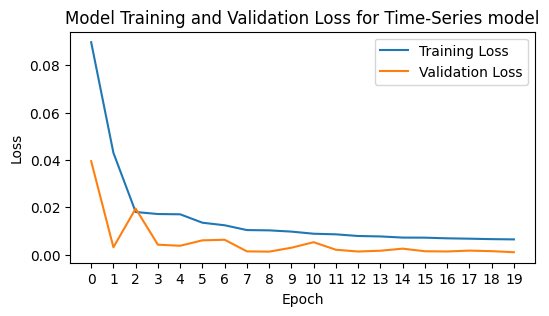

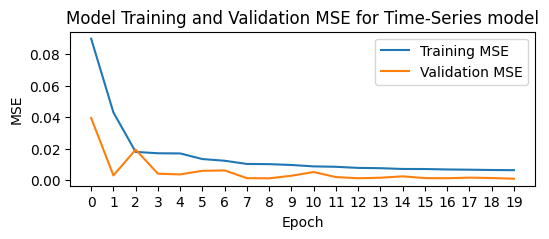

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(6, 3))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss for Time-Series model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
epoch_range = range(0, epochNum)
plt.xticks(epoch_range)
plt.legend()
plt.show()

# Plot the training and validation MSE
plt.figure(figsize=(6, 2))
plt.plot(history.history['mean_squared_error'], label='Training MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Model Training and Validation MSE for Time-Series model')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.xticks(epoch_range)
plt.legend()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


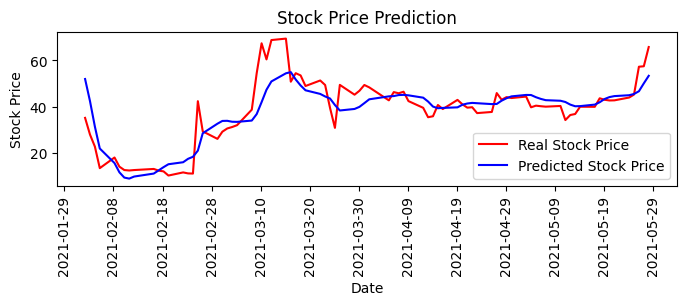

<Figure size 640x480 with 0 Axes>

In [ ]:
# Prediction on train data based model

# Actual
real_train = dataset_train
real_train = dataset_train.iloc[timesteps:len(real_train)+1,1:2].values
train_dates = dataset_train.index.to_list()
adjusted_train_dates = train_dates[timesteps:len(real_train) + timesteps]

# predicted
predicted_train = model.predict(X_train)
predicted_train = np.pad(predicted_train,((0,0),(0,dataNum-1)),'constant')
predicted_train = sc.inverse_transform(predicted_train)
predicted_train = np.delete(predicted_train, [1, 2, 3, 4], axis=1)
np.savetxt('GME_pred_train' + '.csv', predicted_train, fmt="%.3f", delimiter=",")

# chart
plt.figure(figsize=(8, 2))
plt.plot(adjusted_train_dates, real_train, color = 'red', label = 'Real Stock Price')
plt.plot(adjusted_train_dates, predicted_train, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.show()
plt.savefig('pic1.png')

In [ ]:
train_df = pd.DataFrame({
    'Date': pd.to_datetime(adjusted_train_dates).date,
    'Real_Price_Train': real_train.flatten(),
    'Predicted_Price_Train': predicted_train.flatten()})
train_df.tail()

,Date,Real_Price_Train,Predicted_Price_Train
77,2021-05-24,43.962502,44.957954
78,2021-05-25,45.250000,45.497520
79,2021-05-26,57.250000,46.676220
80,2021-05-27,57.450001,50.077217
81,2021-05-28,65.742500,53.332935


test_set (65, 7)
real_test (65, 1)
test_dates (65,)
inputs_test (65, 20, 5)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
predicted_test (65, 1)
(65, 20, 5)
(65, 20, 5)


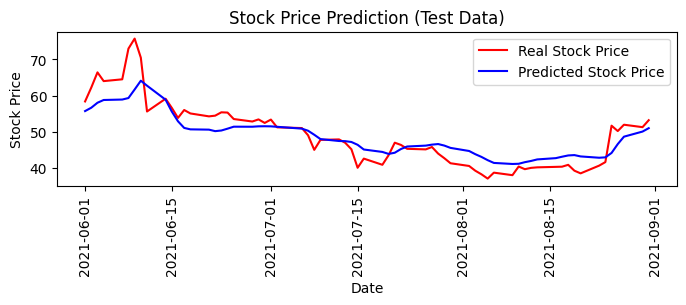

<Figure size 640x480 with 0 Axes>

In [ ]:
# Prediction on test data

# Actual
print('test_set', test_set.shape)
real_test = test_set.iloc[0:lenOfReal+1,1:2].values # test_set.iloc[timesteps:lenOfReal+1,1:2].values
print('real_test', real_test.shape)
test_dates = test_set.index[0:lenOfReal+1] # test_set.index[timesteps:lenOfReal+1]
print('test_dates', test_dates.shape)

# predicted
print('inputs_test', inputs_test.shape)
predicted_test = model.predict(inputs_test)
print('predicted_test', predicted_test.shape)
predicted_test = np.pad(predicted_test,((0,0),(0,dataNum-1)),'constant')
predicted_test = sc.inverse_transform(predicted_test)
predicted_test = np.delete(predicted_test, [1, 2, 3, 4], axis=1)
print(inputs_test.shape)
predicted_test = predicted_test[:len(test_dates)] # NEW
print(inputs_test.shape)
np.savetxt('GME_pred_test' + '.csv', predicted_test, fmt="%.3f", delimiter=",")

## chart
plt.figure(figsize=(8, 2))
plt.plot(test_dates, real_test, color = 'red', label = 'Real Stock Price')
plt.plot(test_dates, predicted_test, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction (Test Data)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=90)
plt.legend()
plt.show()
plt.savefig('pic2.png')

In [ ]:
test_df = pd.DataFrame({
    'Date': pd.to_datetime(test_dates).date,
    'Real_Price_Test': real_test.flatten(),
    'Predicted_Price_Test': predicted_test.flatten()})
test_df.head()

,Date,Real_Price_Test,Predicted_Price_Test
0,2021-06-01,58.369999,55.703697
1,2021-06-02,62.220001,56.632839
2,2021-06-03,66.427498,58.010185
3,2021-06-04,64.004997,58.774548
4,2021-06-07,64.500000,58.898399


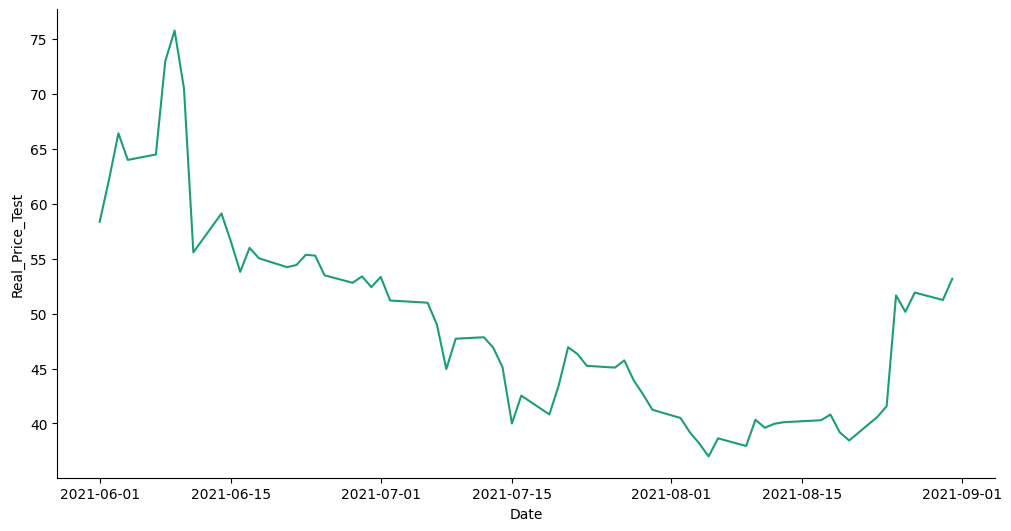

In [ ]:
# @title Date vs Real_Price_Test

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Real_Price_Test']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = test_df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Real_Price_Test')

In [ ]:
# Key stats

## train
print('train_dates', len(train_dates))
print('adjusted_train_dates', len(adjusted_train_dates))
print('real_train', len(real_train))
print('predicted_train', len(predicted_train))

## test
print('\ntest_dates', len(test_dates))
print('real_test', len(real_test))
# print('predicted_test', len(predicted_test))

train_dates 102
adjusted_train_dates 82
real_train 82
predicted_train 82

test_dates 65
real_test 65


In [ ]:
# Evaluation metrics

# train
mseTrain = round(mean_squared_error(real_train, predicted_train), 2)
rmseTrain = round(math.sqrt(mseTrain), 2)
maeTrain = round(mean_absolute_error(real_train, predicted_train), 2)

print("Training Data Metrics:")
print("MSE_train = " + str(mseTrain))
print("RMSE_train = " + str(rmseTrain))
print("MAE_train = " + str(maeTrain))

# test
mseTest = round(mean_squared_error(real_test, predicted_test), 2)
rmseTest = round(math.sqrt(mseTest), 2)
maeTest = round(mean_absolute_error(real_test, predicted_test), 2)

print("\nTesting Data Metrics:")
print("MSE_test = " + str(mseTest))
print("RMSE_test = " + str(rmseTest))
print("MAE_test = " + str(maeTest))

Training Data Metrics:
MSE_train = 51.43
RMSE_train = 7.17
MAE_train = 5.07

Testing Data Metrics:
MSE_test = 18.27
RMSE_test = 4.27
MAE_test = 3.29


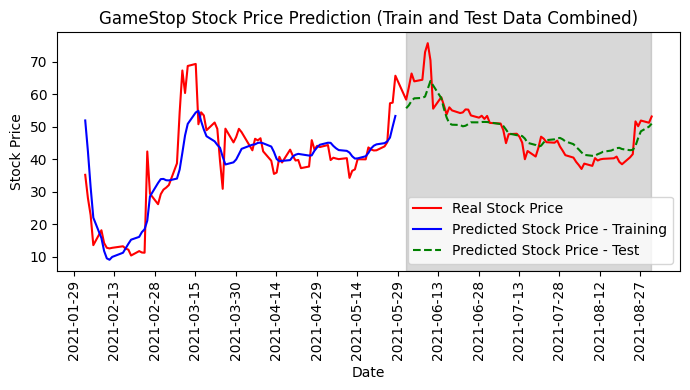

<Figure size 640x480 with 0 Axes>

In [ ]:
# Combined chart

combined_dates = np.concatenate((adjusted_train_dates, test_dates)) # Combine the dates
combined_real = np.concatenate((real_train, real_test)) # Combine the real prices
combined_predicted = np.concatenate((predicted_train, predicted_test)) # Combine the predicted prices

# Create the chart
plt.figure(figsize=(7, 4))
plt.plot(combined_dates, combined_real, color='red', label='Real Stock Price') # Plot the real stock prices
plt.plot(adjusted_train_dates, predicted_train, color='blue', label='Predicted Stock Price - Training') # Plot the predicted stock prices - training period
plt.plot(test_dates, predicted_test, color='green', linestyle='dashed', label='Predicted Stock Price - Test') # Plot the predicted stock prices - test (predicted) period
plt.title('GameStop Stock Price Prediction (Train and Test Data Combined)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

start_date = pd.to_datetime('2021-06-01')
end_date = pd.to_datetime('2021-08-31')
plt.axvspan(start_date, end_date, color='grey', alpha=0.3)

plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.tight_layout()
plt.show()
plt.savefig('pic3.png')

In [ ]:
# Prepare financial data for merging with the sentiment data
stock_prices_df2 = stock_prices_df[['Close', 'Open', 'High', 'Low', 'Volume']].copy()
stock_prices_df2.reset_index(inplace=True)
stock_prices_df2.rename(columns={'Date': 'date'}, inplace=True)
stock_prices_df2['date'] = stock_prices_df2['date'].dt.tz_localize(None)
stock_prices_df2['date'] = stock_prices_df2['date'].dt.strftime('%Y-%m-%d')
stock_prices_df2['date'] = pd.to_datetime(stock_prices_df2['date'])
stock_prices_df2.head(3)

,date,Close,Open,High,Low,Volume
0,2021-01-04,4.3125,4.7500,4.775,4.2875,40090000
1,2021-01-05,4.3425,4.3375,4.520,4.3075,19846000
2,2021-01-06,4.5900,4.3350,4.745,4.3325,24224800


In [ ]:
# Merge financial data with the sentiment data
combined_df = stock_prices_df2.merge(sentiment_aggregated, on='date', how='left')
combined_df.fillna(method='ffill', inplace=True)
combined_df.set_index('date', inplace=True)
print(combined_df.shape)
combined_df.head(3)

(251, 9)


<ipython-input-32-b531b6e6dc08>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method='ffill', inplace=True)


,Close,Open,High,Low,Volume,compound,neg,neu,pos
date,,,,,,,,,
2021-01-04,4.3125,4.7500,4.775,4.2875,40090000,0.98890,0.0000,0.1340,0.8660
2021-01-05,4.3425,4.3375,4.520,4.3075,19846000,0.11795,0.0575,0.8145,0.1280
2021-01-06,4.5900,4.3350,4.745,4.3325,24224800,0.38885,0.0535,0.7580,0.1885


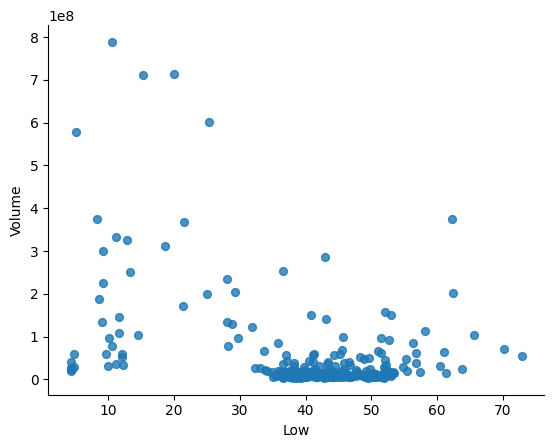

In [ ]:
# @title Low vs Volume

from matplotlib import pyplot as plt
combined_df.plot(kind='scatter', x='Low', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

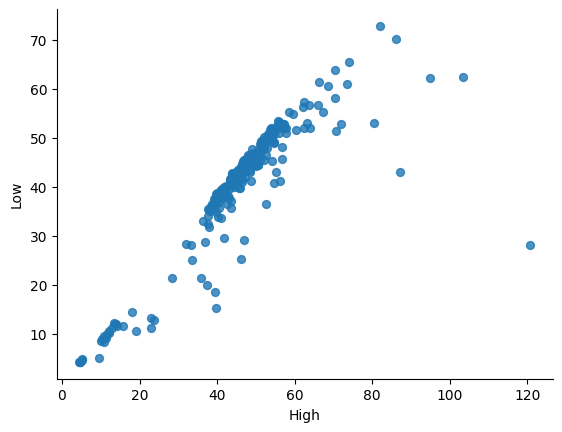

In [ ]:
# @title High vs Low

from matplotlib import pyplot as plt
combined_df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
combined_df.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'compound', 'neg', 'neu',
       'pos'],
      dtype='object')

In [ ]:
# Splitting the data into train/val/test

# Config
dataNum = 8
timesteps = 10
epochNum = 300

# Train
dataset_train = combined_df[combined_df.index < '2021-06-01']
print(dataset_train.shape)
training_set = dataset_train.iloc[:,1:dataNum+1].values
print(training_set.shape)

# Feature scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled.shape)

#Splitting into inputs/targets
X_train = []
Y_train = []
for i in range(timesteps, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-timesteps:i, 0:dataNum])
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
print(X_train.shape, Y_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], dataNum))
print(X_train.shape, Y_train.shape)

# Validation
val_df = combined_df[(combined_df.index >= '2021-09-01') & (combined_df.index <= '2021-12-31')]
validation_set = val_df.iloc[:, 1:dataNum+1].values

# Feature scaling
validation_set_scaled = sc.transform(validation_set)

#Splitting into inputs/targets
X_val = []
Y_val = []
for i in range(timesteps, len(validation_set_scaled)):
    X_val.append(validation_set_scaled[i-timesteps:i, 0:dataNum])
    Y_val.append(validation_set_scaled[i, 0])
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], dataNum))

# Test
test_set = combined_df[(combined_df.index >= '2021-06-01') & (combined_df.index < '2021-09-01')]
print(test_set.shape)
real_stock_price = test_set.iloc[:,1:dataNum+1].values
print(real_stock_price.shape)
lenOfReal = len(real_stock_price)
inputs = real_stock_price
inputs = sc.transform(inputs)
print(inputs.shape)

# Combine the last 20 days of training data with the test data
last_20_days_training = training_set_scaled[-timesteps:]
print('last_20_days_training', last_20_days_training.shape)
combined_test_data = np.concatenate((last_20_days_training, inputs))
print('inputs', inputs.shape)
print('combined_test_data', combined_test_data.shape)

inputs_test = []
for i in range(timesteps, len(inputs) + timesteps):
    inputs_test.append(combined_test_data[i-timesteps:i, 0:dataNum])
inputs_test = np.array(inputs_test)
inputs_test = np.reshape(inputs_test, (inputs_test.shape[0], inputs_test.shape[1], dataNum))
print('inputs_test', inputs_test.shape)

(102, 9)
(102, 8)
(102, 8)
(92, 10, 8) (92,)
(92, 10, 8) (92,)
(65, 9)
(65, 8)
(65, 8)
last_20_days_training (10, 8)
inputs (65, 8)
combined_test_data (75, 8)
inputs_test (65, 10, 8)


In [ ]:
# Define the model
model_combined = Sequential()

model_combined.add(LSTM(units=800, input_shape=(X_train.shape[1], dataNum), return_sequences=True))
model_combined.add(Dropout(0.05))
model_combined.add(LSTM(units=700))

model_combined.add(Dense(units=1))
model_combined.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
model_combined.summary()

# Train the model and save the history
history_combined = model_combined.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=20, epochs=epochNum)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 10, 800)        │     2,588,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 800)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 700)            │     4,202,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           701 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,792,301 (25.91 MB)

 Trainable params: 6,792,301 (25.91 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.2386 - mean_squared_error: 0.2386 - val_loss: 0.1272 - val_mean_squared_error: 0.1272
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0838 - mean_squared_error: 0.0838 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0053 - val_mean

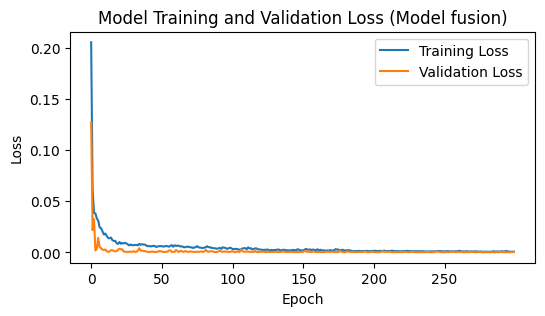

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(6, 3))
plt.plot(history_combined.history['loss'], label='Training Loss')
plt.plot(history_combined.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss (Model fusion)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
epoch_range = range(0, epochNum, 50)
plt.xticks(epoch_range)
plt.legend()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


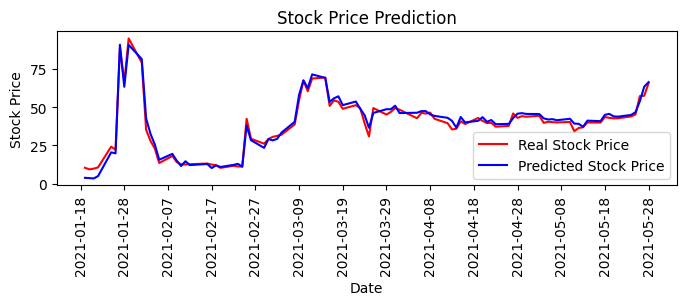

<Figure size 640x480 with 0 Axes>

In [ ]:
# Prediction on train data

# Actual
real_train = dataset_train
real_train = dataset_train.iloc[timesteps:len(real_train)+1,1:2].values
train_dates = dataset_train.index.to_list()
adjusted_train_dates = train_dates[timesteps:len(real_train) + timesteps]

# predicted
predicted_train = model_combined.predict(X_train)
dummy_array = np.zeros((predicted_train.shape[0], training_set_scaled.shape[1]))
dummy_array[:, 0] = predicted_train.flatten()
predicted_train = sc.inverse_transform(dummy_array)[:, 0]
predicted_train= predicted_train.reshape(-1, 1)
np.savetxt('GME_pred_train' + '.csv', predicted_train, fmt="%.3f", delimiter=",")

# chart
plt.figure(figsize=(8, 2))
plt.plot(adjusted_train_dates, real_train, color = 'red', label = 'Real Stock Price')
plt.plot(adjusted_train_dates, predicted_train, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.show()
plt.savefig('pic1.png')

In [ ]:
train_df = pd.DataFrame({
    'Date': pd.to_datetime(adjusted_train_dates).date,
    'Real_Price_Train': real_train.flatten(),
    'Predicted_Price_Train': predicted_train.flatten()})
train_df.tail()

,Date,Real_Price_Train,Predicted_Price_Train
87,2021-05-24,43.962502,44.934150
88,2021-05-25,45.250000,46.728530
89,2021-05-26,57.250000,53.921197
90,2021-05-27,57.450001,63.443006
91,2021-05-28,65.742500,66.395710


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


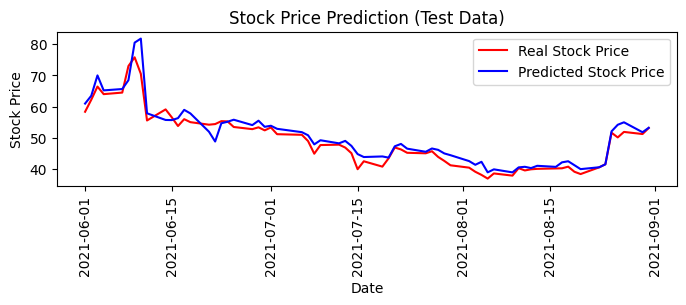

<Figure size 640x480 with 0 Axes>

In [ ]:
# Prediction on test data

# Actual
real_test = test_set.iloc[0:lenOfReal+1,1:2].values
test_dates = test_set.index[0:lenOfReal+1]

# predicted
predicted_test = model_combined.predict(inputs_test)
dummy_array = np.zeros((predicted_test.shape[0], training_set_scaled.shape[1]))
dummy_array[:, 0] = predicted_test.flatten()
predicted_test = sc.inverse_transform(dummy_array)[:, 0]
predicted_test = predicted_test.reshape(-1, 1)
np.savetxt('GME_pred_test' + '.csv', predicted_test, fmt="%.3f", delimiter=",")

# chart
plt.figure(figsize=(8, 2))
plt.plot(test_dates, real_test, color = 'red', label = 'Real Stock Price')
plt.plot(test_dates, predicted_test, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction (Test Data)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=90)
plt.legend()
plt.show()
plt.savefig('pic2.png')

In [ ]:
test_df = pd.DataFrame({
    'Date': pd.to_datetime(test_dates).date,
    'Real_Price_Test': real_test.flatten(),
    'Predicted_Price_Test': predicted_test.flatten()})
test_df.head()

,Date,Real_Price_Test,Predicted_Price_Test
0,2021-06-01,58.369999,60.989664
1,2021-06-02,62.220001,63.490724
2,2021-06-03,66.427498,69.993526
3,2021-06-04,64.004997,65.204788
4,2021-06-07,64.500000,65.638565


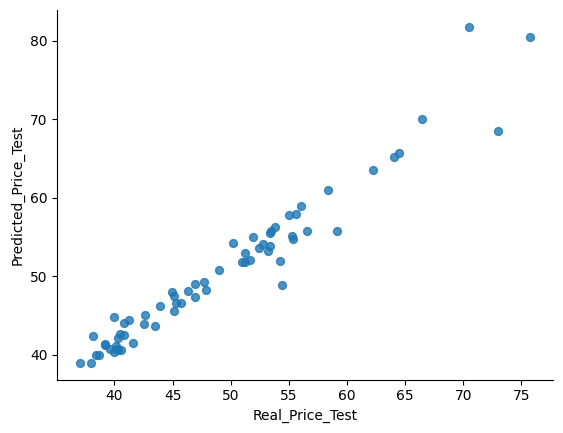

In [ ]:
# @title Real_Price_Test vs Predicted_Price_Test

from matplotlib import pyplot as plt
test_df.plot(kind='scatter', x='Real_Price_Test', y='Predicted_Price_Test', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Evaluation metrices

# train
mseTrain = round(mean_squared_error(real_train, predicted_train), 2)
rmseTrain = round(math.sqrt(mseTrain), 2)
maeTrain = round(mean_absolute_error(real_train, predicted_train), 2)

print("Training Data Metrics:")
print("MSE_train = " + str(mseTrain))
print("RMSE_train = " + str(rmseTrain))
print("MAE_train = " + str(maeTrain))

# test
mseTest = round(mean_squared_error(real_test, predicted_test), 2)
rmseTest = round(math.sqrt(mseTest), 2)
maeTest = round(mean_absolute_error(real_test, predicted_test), 2)

print("\nTesting Data Metrics:")
print("MSE_test = " + str(mseTest))
print("RMSE_test = " + str(rmseTest))
print("MAE_test = " + str(maeTest))

Training Data Metrics:
MSE_train = 8.04
RMSE_train = 2.84
MAE_train = 2.32

Testing Data Metrics:
MSE_test = 6.95
RMSE_test = 2.64
MAE_test = 1.99


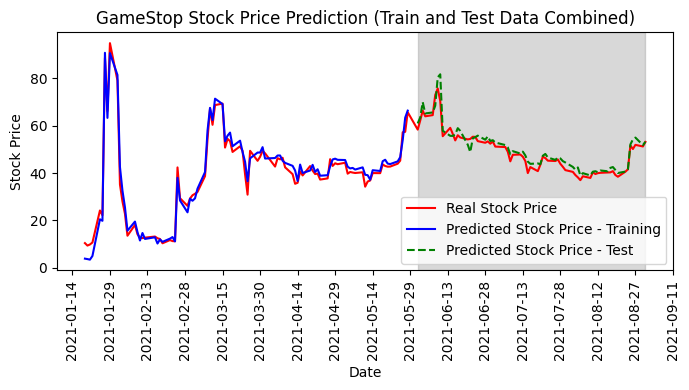

<Figure size 640x480 with 0 Axes>

In [ ]:
# Combined chart

adjusted_train_dates = pd.to_datetime(adjusted_train_dates)
test_dates = pd.to_datetime(test_dates)

combined_dates = np.concatenate((adjusted_train_dates, test_dates))
combined_real = np.concatenate((real_train, real_test))
combined_predicted = np.concatenate((predicted_train, predicted_test))

# Create the chart
plt.figure(figsize=(7, 4))
plt.plot(combined_dates, combined_real, color='red', label='Real Stock Price')
plt.plot(adjusted_train_dates, predicted_train, color='blue', label='Predicted Stock Price - Training')
plt.plot(test_dates, predicted_test, color='green', linestyle='dashed', label='Predicted Stock Price - Test')
plt.title('GameStop Stock Price Prediction (Train and Test Data Combined)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

start_date = pd.to_datetime('2021-06-01')
end_date = pd.to_datetime('2021-08-31')
plt.axvspan(start_date, end_date, color='grey', alpha=0.3)

plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.tight_layout()
plt.show()
plt.savefig('pic3.png')

In [ ]:
import nltk
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Set the NLTK data path
nltk.data.path.append('/content/nltk_data')

# Download required NLTK resources
try:
    nltk.download('punkt', download_dir='/content/nltk_data')
    nltk.download('stopwords', download_dir='/content/nltk_data')
    nltk.download('punkt_tab', download_dir='/content/nltk_data')  # Add this line
except:
    pass  # Just in case the downloads fail, we'll try to proceed anyway

# Point NLTK to the correct data directory
nltk.data.path.append('/content/nltk_data')

# Example DataFrame
reddit_harvard_df = pd.DataFrame({
    'date': ['2021-01-01', '2021-01-15', '2021-01-30'],
    'title': ['Harvard studies AI', 'New research on vaccines', 'Breakthrough in physics'],
    'compound': [0.5, 0.7, 0.9],
    'neg': [0.1, 0.0, 0.0],
    'neu': [0.7, 0.6, 0.5],
    'pos': [0.2, 0.4, 0.5],
    'id': [1, 2, 3],
    'num_comments': [10, 20, 15]
})

# Convert 'date' column to datetime
reddit_harvard_df['date'] = pd.to_datetime(reddit_harvard_df['date'])
reddit_harvard_df_jan = reddit_harvard_df[
    (reddit_harvard_df['date'] >= '2021-01-01') & (reddit_harvard_df['date'] <= '2021-01-31')
]

# Sentiment Analysis -- Analyze average sentiment scores
avg_sentiment = reddit_harvard_df_jan[['compound', 'neg', 'neu', 'pos']].mean()

# Volume Analysis -- Count the number of posts and comments
volume = reddit_harvard_df_jan[['id', 'num_comments']].count()

# Theme Analysis -- Extract top N most frequent words in post titles
stop_words = set(stopwords.words('english'))

def get_top_n_words(text_series, n=10):
    all_words = ' '.join([text.lower() for text in text_series])
    all_words = word_tokenize(all_words)
    all_words = [word for word in all_words if word.isalpha() and word not in stop_words]
    word_freq = Counter(all_words)
    return word_freq.most_common(n)

top_words = get_top_n_words(reddit_harvard_df_jan['title'])
print("Average Sentiment - Training Period:", avg_sentiment)
print("\nVolume - Training Period:", volume)
print("\nTop Words - Training Period:", top_words)

[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Average Sentiment - Training Period: compound    0.700000
neg         0.033333
neu         0.600000
pos         0.366667
dtype: float64

Volume - Training Period: id              3
num_comments    3
dtype: int64

Top Words - Training Period: [('harvard', 1), ('studies', 1), ('ai', 1), ('new', 1), ('research', 1), ('vaccines', 1), ('breakthrough', 1), ('physics', 1)]


In [ ]:
nltk.__version__

'3.9.1'

In [ ]:
import nltk

# Download 'punkt' and 'stopwords' in the Colab environment
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
import os

# Set custom path for NLTK data in Colab
nltk.data.path.append('/content/nltk_data')

# Ensure downloads go to this path
nltk.download('punkt', download_dir='/content/nltk_data')
nltk.download('stopwords', download_dir='/content/nltk_data')

[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

# Test the tokenizer
print(word_tokenize("This is a test sentence."))

['This', 'is', 'a', 'test', 'sentence', '.']


In [ ]:
import os
os.environ['NLTK_DATA'] = '/path/to/your/nltk_data'

In [ ]:
from nltk.tokenize import word_tokenize
print(word_tokenize("This is a test sentence."))

['This', 'is', 'a', 'test', 'sentence', '.']


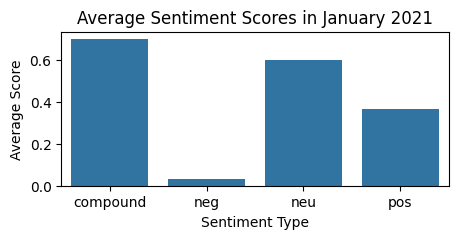

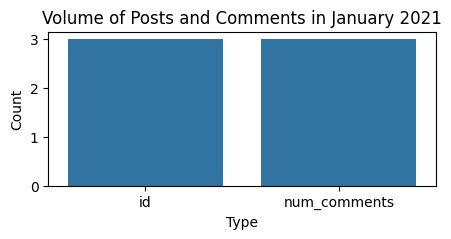

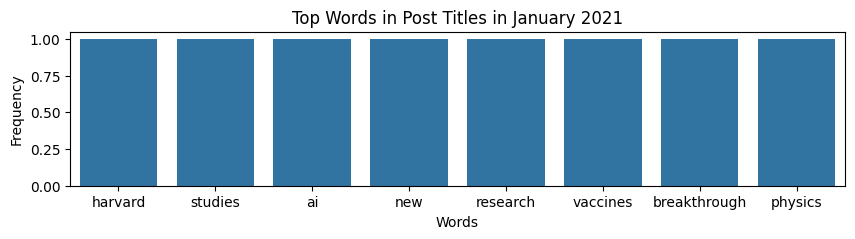

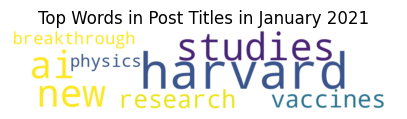

In [ ]:
# 1. Sentiment Analysis Visualization
plt.figure(figsize=(5, 2))
sns.barplot(x=avg_sentiment.index, y=avg_sentiment.values)
plt.title('Average Sentiment Scores in January 2021')
plt.ylabel('Average Score')
plt.xlabel('Sentiment Type')
plt.show()

# 2. Volume Analysis Visualization

plt.figure(figsize=(5, 2))
sns.barplot(x=volume.index, y=volume.values)
plt.title('Volume of Posts and Comments in January 2021')
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()


# 3. Top Words Analysis Visualization
top_words_dict = dict(top_words)  # Convert list of tuples to dictionary
plt.figure(figsize=(10, 2))
sns.barplot(x=list(top_words_dict.keys()), y=list(top_words_dict.values()))
plt.title('Top Words in Post Titles in January 2021')
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.xticks(rotation=0)
plt.show()

# 4. Word Cloud for Key Themes
wordcloud = WordCloud(width=1000, height=200, background_color='white').generate_from_frequencies(top_words_dict)
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Words in Post Titles in January 2021')
plt.show()

In [ ]:
# Convert 'date' column to datetime
reddit_harvard_df['date'] = pd.to_datetime(reddit_harvard_df['date'])
reddit_harvard_df_all = reddit_harvard_df[(reddit_harvard_df['date'] >= '2021-01-01') & (reddit_harvard_df['date'] < '2021-09-01')]

# Sentiment Analysis -- Analyze average sentiment scores
avg_sentiment_all = reddit_harvard_df_all[['compound', 'neg', 'neu', 'pos']].mean()

# Volume Analysis -- Count the number of posts and comments
volume_all = reddit_harvard_df_all[['id', 'num_comments']].count()

# Theme Analysis -- Extract top N most frequent words in post titles
stop_words = set(stopwords.words('english'))

def get_top_n_words(text_series, n=10):
    all_words = ' '.join([text.lower() for text in text_series])
    all_words = word_tokenize(all_words)
    all_words = [word for word in all_words if word.isalpha() and word not in stop_words]
    word_freq = Counter(all_words)
    return word_freq.most_common(n)

top_words_all = get_top_n_words(reddit_harvard_df_all['title'])
print("Average Sentiment - Training Period:", avg_sentiment)
print("\nVolume - Training Period:", volume)
print("\nTop Words - Training Period:", top_words)

Average Sentiment - Training Period: compound    0.700000
neg         0.033333
neu         0.600000
pos         0.366667
dtype: float64

Volume - Training Period: id              3
num_comments    3
dtype: int64

Top Words - Training Period: [('harvard', 1), ('studies', 1), ('ai', 1), ('new', 1), ('research', 1), ('vaccines', 1), ('breakthrough', 1), ('physics', 1)]


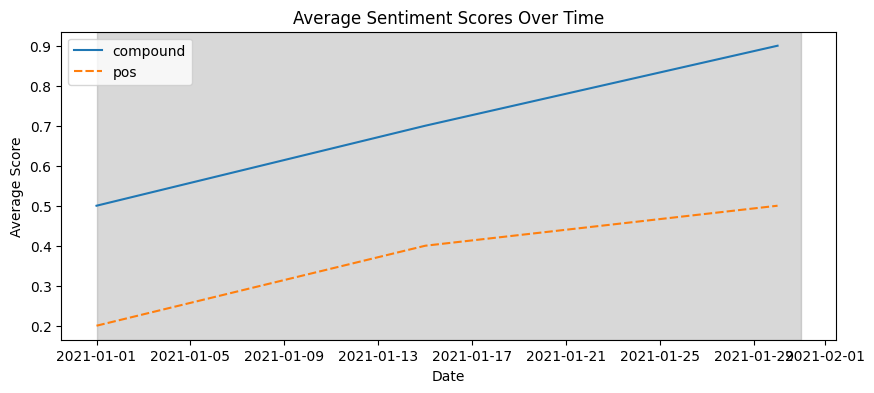

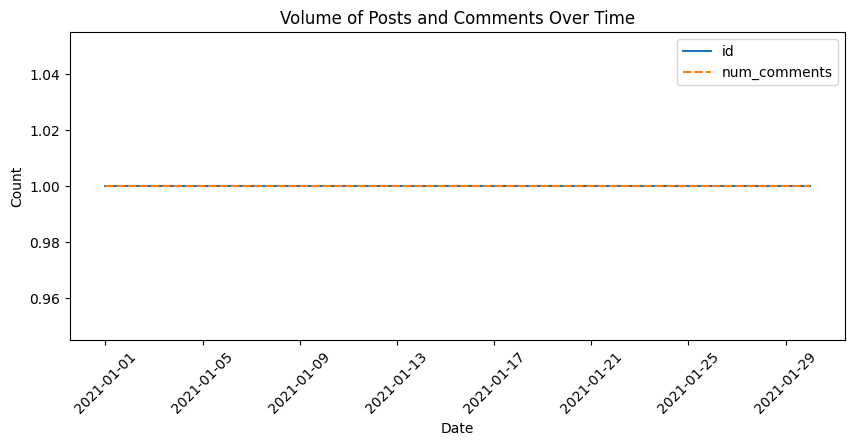

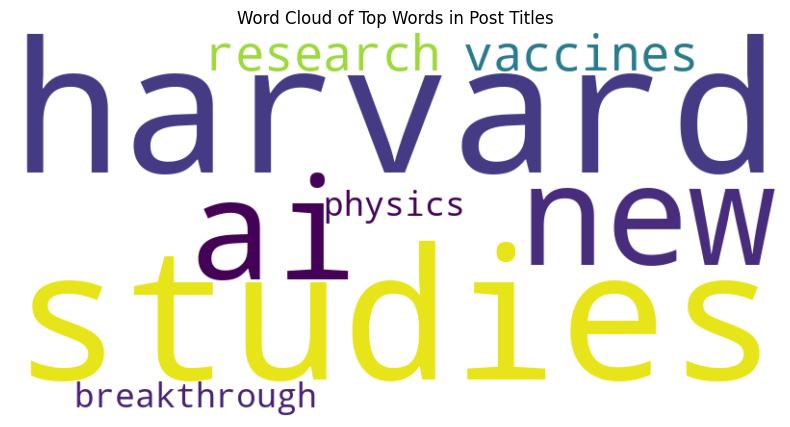

In [ ]:
# Sentiment Over Time
sentiment_over_time = reddit_harvard_df_all.groupby(reddit_harvard_df_all['date'].dt.date)[['compound', 'pos']].mean()
plt.figure(figsize=(10, 4))
sns.lineplot(data=sentiment_over_time)
plt.title('Average Sentiment Scores Over Time')
plt.ylabel('Average Score')
plt.xlabel('Date')
start_date = '2021-01-01'
end_date = '2021-01-31'
plt.axvspan(start_date, end_date, color='grey', alpha=0.3)
plt.xticks(rotation=0)
plt.show()

# Volume Over Time
volume_over_time = reddit_harvard_df_all.groupby(reddit_harvard_df_all['date'].dt.date)[['id', 'num_comments']].count()
plt.figure(figsize=(10, 4))
sns.lineplot(data=volume_over_time)
plt.title('Volume of Posts and Comments Over Time')
plt.ylabel('Count')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()


# Word Cloud for Key Themes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Words in Post Titles')
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


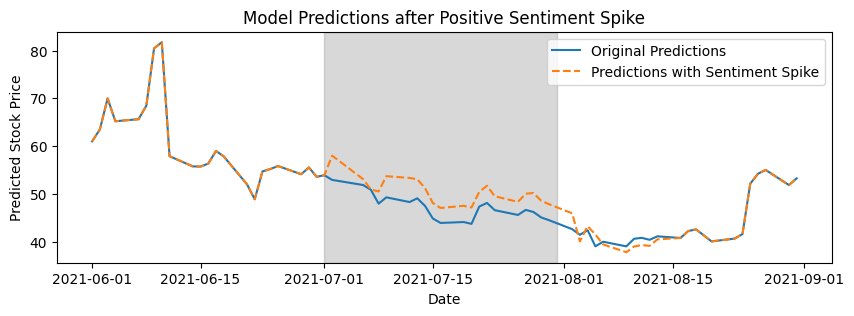

In [ ]:
# 1. Create a simulated sentiment spike
start_spike = '2021-07-01'
end_spike = '2021-07-31'
test_set_spike = test_set.copy()

# Apply an artificial spike in sentiment
spike_factor = 0.5  # This is an arbitrary factor to increase the sentiment
test_set_spike.loc[start_spike:end_spike, 'compound'] += spike_factor
test_set_spike['compound'] = test_set_spike['compound'].clip(-1, 1)

# 2. Re-run the model with simulated data
inputs_spike = test_set_spike.iloc[:, 1:dataNum+1].values
inputs_spike = sc.transform(inputs_spike)
combined_test_data_spike = np.concatenate((last_20_days_training, inputs_spike))

inputs_test_spike = []
for i in range(timesteps, len(inputs_spike) + timesteps):
    inputs_test_spike.append(combined_test_data_spike[i-timesteps:i, 0:dataNum])
inputs_test_spike = np.array(inputs_test_spike)
inputs_test_spike = np.reshape(inputs_test_spike, (inputs_test_spike.shape[0], inputs_test_spike.shape[1], dataNum))

# 3. Get predictions
predicted_test_spike = model_combined.predict(inputs_test_spike)
dummy_array = np.zeros((predicted_test_spike.shape[0], training_set_scaled.shape[1]))
dummy_array[:, 0] = predicted_test_spike.flatten()
predicted_test_spike = sc.inverse_transform(dummy_array)[:, 0]
predicted_test_spike = predicted_test_spike.reshape(-1, 1)

# 4. Compare the results
plt.figure(figsize=(10, 3))
plt.plot(test_dates, predicted_test, label='Original Predictions')
plt.plot(test_dates, predicted_test_spike, label='Predictions with Sentiment Spike', linestyle='dashed')
plt.title('Model Predictions after Positive Sentiment Spike')
plt.xlabel('Date')
plt.ylabel('Predicted Stock Price')
plt.legend()
plt.axvspan(start_spike, end_spike, color='grey', alpha=0.3)
plt.xticks(rotation=0)
plt.show()